# Understanding customers - solution


In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

Load the data into a Pandas DataFrame, name it as `df_shopping` and fetch the top 10 rows.

In [2]:
df_shopping = pd.read_csv("../Resources/shopping_data.csv")
df_shopping.head(10)

,CustomerID,Previous Shopper,Age,Annual Income,Spending Score (1-100)
0,1,Yes,52,38000,45
1,2,Yes,40,39000,57
2,3,No,57,46000,59
3,4,Yes,54,41000,51
4,5,No,55,45000,53
5,6,Yes,33,41000,51
6,7,Yes,33,45000,48
7,8,Yes,41,49000,52
8,9,Yes,54,39000,55
9,10,Yes,34,44000,53


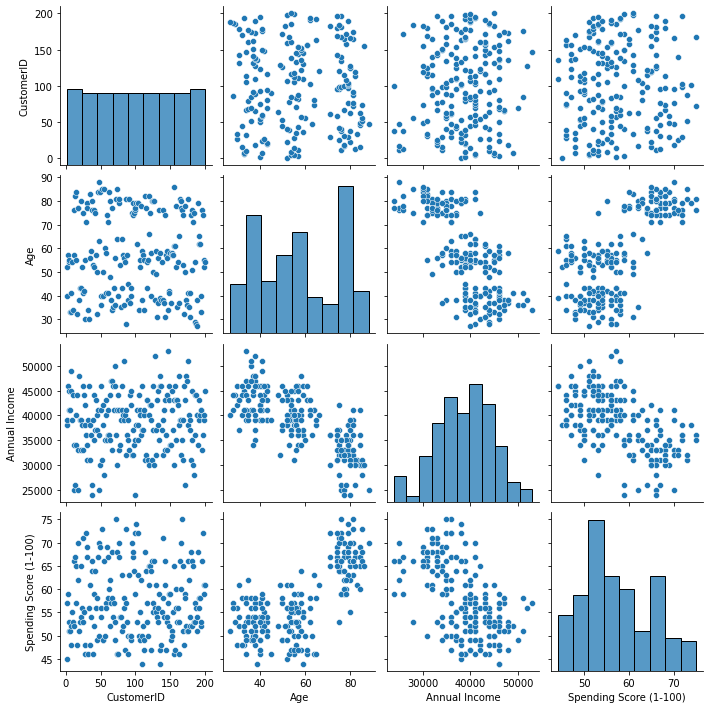

In [3]:
sns.pairplot(df_shopping, diag_kind="hist")
plt.show()

List the DataFrame's data types to ensure they're aligned to the type of data stored on each column.

In [4]:
df_shopping.dtypes

CustomerID                 int64
Previous Shopper          object
Age                        int64
Annual Income              int64
Spending Score (1-100)     int64
dtype: object

**Question 1:** Is there any column whose data type need to be changed? If so, make the corresponding adjustments.

**Answer:** All columns have an appropriate data type.

**Question 2:** Is there any unnecessary column that needs to be dropped? If so, make the corresponding adjustments.

**Answer:** We can drop the `CustomerID` column. It's not relevant for clustering since it doesn't denote any relevant characteristic of customers shopping habits.

In [5]:
# Remove the CustomerID Column
df_shopping = df_shopping.drop(columns=["CustomerID"])
df_shopping.head()

,Previous Shopper,Age,Annual Income,Spending Score (1-100)
0,Yes,52,38000,45
1,Yes,40,39000,57
2,No,57,46000,59
3,Yes,54,41000,51
4,No,55,45000,53


Remove all rows with `null` values if any.

In [6]:
print("Number of rows before removing nulls:", len(df_shopping))

df_shopping = df_shopping.dropna()

print("Number of rows after removing nulls:", len(df_shopping))

Number of rows before removing nulls: 200
Number of rows after removing nulls: 200


Remove duplicate entries if any.

In [7]:
print("Number of rows before removing duplicates:", len(df_shopping))

df_shopping = df_shopping.drop_duplicates()

print("Number of rows after removing duplicates:", len(df_shopping))

Number of rows before removing duplicates: 200
Number of rows after removing duplicates: 200


**In order to use unsupervised learning algorithms, all the features should be numeric, and also, on similar scales.**

The `Gender` column contains categorical data. Anytime you have categorical variables, you should transform them to a numerical value. In this case, transform `Male` to `1` and `Female` to `0`.

In [8]:
# Transform Previous Customer column
def changeStatus(status):
    if status == "Yes":
        return 1
    else:
        return 0

# Along with replace() and map(), this is another way to encode the gender column into numbers.
df_shopping["Previous Shopper"] = df_shopping["Previous Shopper"].apply(changeStatus)

df_shopping.head()

,Previous Shopper,Age,Annual Income,Spending Score (1-100)
0,1,52,38000,45
1,1,40,39000,57
2,0,57,46000,59
3,1,54,41000,51
4,0,55,45000,53


Scale the all columns to bring them into the same range and save the results in a new DataFrame.

In [9]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_shopping)

# Create a DataFrame with the transformed data
df_shopping_scaled = pd.DataFrame(scaled_data, columns=df_shopping.columns)

# Rename the spending score column
df_shopping_scaled = df_shopping_scaled.rename(columns={'Spending Score (1-100)': 'Spending Score'})

# Preview DataFrame
df_shopping_scaled.head()

,Previous Shopper,Age,Annual Income,Spending Score
0,0.750000,-0.295240,-0.118424,-1.625204
1,0.750000,-0.979855,0.051970,-0.053060
2,-1.333333,-0.009984,1.244733,0.208964
3,0.750000,-0.181138,0.392760,-0.839132
4,-1.333333,-0.124086,1.074338,-0.577108


Save the cleaned DataFrame as a `CSV` file, name it as `shopping_data_cleaned.csv`.

In [10]:
# Saving cleaned data
df_shopping_scaled.to_csv("../Resources/shopping_data_cleaned.csv", index=False)